#分词--后可以按频率排布nltk，特征（word或stem的话）可能有无数多个选取前多少还是全部？？，pos相对较少，（四种feature），
对应每条entry生成一个矩阵行

0.分割train，validation，test集--sklearn
  读取tran集

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import json
import numpy as np
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qxy09\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# train = pd.read_csv("train.csv")
# train.drop(['Unnamed: 0'], axis=1,inplace=True)
# print(len(train))
# train.head()

def get_data(file):
    data = pd.read_csv("DCLSA/literature_author_dataset/"+file)
    data.drop(['Unnamed: 0','book'], axis=1,inplace=True)
    #print(len(data))
    #data.head()
    # print(type(train['year'].tolist()))
    # print(train['text'])
    #print(train.ix[[0],['text']])

    x,y = data.ix[:,1],data.ix[:,0]
    #测试集为25%，训练集为75%
    train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=0)
    # print(len(train_x))
    # print(len(train_y))
    #print(type(train_x))
    # print(len(test_x))
    train_x = train_x.reset_index(drop=True)
    train_y = train_y.reset_index(drop=True)
#     print(train_x)
#     print(train_y)
    test_x = test_x.reset_index(drop=True)
    test_y = test_y.reset_index(drop=True)
#     print(test_x)
#     print(test_y)
    return train_x,train_y,test_x,test_y

#获取ab.csv这个数据集的训练集和测试机
ab_train_x,ab_train_y,ab_test_x,ab_test_y = get_data("ab.csv")



D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [3]:
ab_train_x.head()

0    Louise Imogen Guiney was born in Boston on Jan...
1    And now, with the youth of the year, hath come...
2    There could not have been a more sympathetic m...
3    We who are Tiverton born, though false ambitio...
4    THE old Winterbourne house, one of New England...
Name: text, dtype: object

In [2]:
#全集的get_data
import pandas as pd
def get_data_all():
    data = pd.read_csv("all_ohc.csv")
    data.drop(['Unnamed: 0','book','author'], axis=1,inplace=True)
    #print(len(data))
    #data.head()
    # print(type(train['year'].tolist()))
    # print(train['text'])
    #print(train.ix[[0],['text']])

    x,y = data.ix[:,1:],data.ix[:,0]
    #测试集为25%，训练集为75%
    train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=0)
    train_x = train_x.reset_index(drop=True)
    train_y = train_y.reset_index(drop=True)
    print(len(train_x))
    print(len(train_y))
    test_x = test_x.reset_index(drop=True)
    test_y = test_y.reset_index(drop=True)
    print(len(test_x))
    print(len(test_y))
    return train_x,train_y,test_x,test_y

all_train_x,all_train_y,all_test_x,all_test_y = get_data_all()
print(all_train_x.iloc[:,1:].head())
print(all_train_x.head())
print(all_train_y.head())

414
414
138
138
     0    1    2    3    4    5    6    7    8    9 ...    12   13   14   15  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    16   17   18   19   20   21  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 22 columns]
                                                text    0    1    2    3    4  \
0  In spite of Jean-Jacques and his school, men a...  0.0  0.0  0.0  0.0  0.0   
1  IT was a decided uncompromising rainy day. The...  0.0  0.0  0.0  0.0  0.0   
2  THE old Winterbourne house, on

D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [32]:
import pandas as pd
#全集的get_data
def get_data_social():
    data = pd.read_csv("pan13-author-profiling-training-corpus-2013-01-09\data1.csv", lineterminator='\n')
    #data = pd.read_csv("test_data.csv", lineterminator='\n')
    data.drop(['Unnamed: 0','Unnamed: 0.1','gender'], axis=1,inplace=True)
    #print(len(data))
    
    data1 = data.loc[data['age_group\r'] == 1]
    data2 = data.loc[data['age_group\r'] == 2]
    data3 = data.loc[data['age_group\r'] == 3]
    # print(len(data1))
    # print(len(data2))
    # print(len(data3))

    rand_arr1 = np.arange(len(data1)/2)
    np.random.shuffle(rand_arr1)
    data11 = data1.iloc[rand_arr1]
    print(len(data11))

    rand_arr2 = np.arange(len(data2)/2)
    np.random.shuffle(rand_arr2)
    data22 = data2.iloc[rand_arr2]
    print(len(data22))

    rand_arr3 = np.arange(len(data3)/2)
    np.random.shuffle(rand_arr3)
    data33 = data3.iloc[rand_arr3]
    print(len(data33))

    data_new = pd.concat([data11,data22,data33])
    print(len(data_new))
    
    data = data_new

    x,y = data.ix[:,0],data.ix[:,1]
    #测试集为25%，训练集为75%
    train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=0)
    train_x = train_x.reset_index(drop=True)
    train_y = train_y.reset_index(drop=True)
    print(len(train_x))

    test_x = test_x.reset_index(drop=True)
    test_y = test_y.reset_index(drop=True)
    print(len(test_x))
    
    train_list=[]
    for i in list(train_x):
        s = i.strip()
        i = s
        train_list.append(i)
    
    test_list=[]
    for i in list(test_x):
        s = i.strip()
        i = s
        test_list.append(i)
    
    train_x1 = pd.Series(train_list)
    test_x1 = pd.Series(test_list)
        
    return train_x1,train_y,test_x1,test_y

#生成social media集的训练集和测试集
social_train_x,social_train_y,social_test_x,social_test_y = get_data_social()
# print(social_train_x.head())
# print(social_train_y.head())
# print(type(social_train_x))
print(len(social_train_x))

8600
42900
66800
118300
88725
29575


D:\anaconda\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


88725


In [11]:
#由于数据量过大，内存首先，随机按年龄比例选取50%，
data = pd.read_csv("pan13-author-profiling-training-corpus-2013-01-09\data1.csv", lineterminator='\n')

data.drop(['Unnamed: 0','Unnamed: 0.1','gender'], axis=1,inplace=True)


NameError: name 'df' is not defined

In [30]:
data1 = data.loc[data['age_group\r'] == 1]
data2 = data.loc[data['age_group\r'] == 2]
data3 = data.loc[data['age_group\r'] == 3]
# print(len(data1))
# print(len(data2))
# print(len(data3))

rand_arr1 = np.arange(len(data1)/2)
np.random.shuffle(rand_arr1)
data11 = data1.iloc[rand_arr1]
print(len(data11))

rand_arr2 = np.arange(len(data2)/2)
np.random.shuffle(rand_arr2)
data22 = data2.iloc[rand_arr2]
print(len(data22))

rand_arr3 = np.arange(len(data3)/2)
np.random.shuffle(rand_arr3)
data33 = data3.iloc[rand_arr3]
print(len(data33))

data_new = pd.concat([data11,data22,data33])
print(len(data_new))


8600
42900
66800
                                                     text  age_group\r
80042   \r\t\t\tWe produce and export Chemical Product...            1
44767   \r\t\t\tIt is a new year, all of us are just i...            1
16944   \r\t\t\tYou need to take proper care of your s...            1
60721   \r\t\t\tIn this lives, often a lot of the appe...            1
62047   \r\t\t\tThe museum here is open up through the...            1
50873   \r\t\t\they guys im emma cookson, and i sing o...            1
117302  \r\t\t\tThe furniture is usually the first thi...            1
73751   \r\t\t\tMany students and I took part in the t...            1
14030   \r\t\t\tOrder wine by the glass, not the bottl...            1
60065   \r\t\t\tWhen you look at how many plus size <a...            1
23054   \r\t\t\tMany banks and finance companies offer...            1
59252   \r\t\t\tToday, most house painting paints is n...            1
80204   \r\t\t\tIf you locate yourself hemming and haw...   

1.特征提取：word分词，stem，pos，pos+word。---都可以以jason形式保存，随时提取（保存好）
1）先分词，生成list
2）用nltk讲word list变成stem，pos，（pos，word）形式
3）保存各自的list就是该feature

2.生成矩阵:!!注意，train，validation和test都是各自生成了各自的feature，只是方法一样，变成了三个对应的矩阵而已！！
（先分好的train，validation,test分别返回，参见get_data函数（对应取用哪个feature type）），对应的csv，也有对应的y值

3.应用linear regression--用sklearn，将预测结果保存成csv(只有两列，真实 结果和预测结果）

4.分析线性相关性的因素，从3种feature各自分析，哪些特征是最相关的，并且呈现什么变化（通过统计方法，x值和y值做图说明seaborn可以说明）

In [11]:
list(social_train_x)[0].strip()

'Another way of receiving cosmetology education is using the distance learning with the assistance of which people may research beauty therapy or receive qualification via a reflexology or maybe massage course. ;;Let us take a look at the beauty therapy college course more thoroughly. While covering this training manual an individual will get much information about products, equipment and treatment plans. The beauty therapy college course will supply a student with the company side of the beauty therapy industry not to mention with the principles in its work. It might possibly be just perfect to include the course successfully, when the successful completion of the beauty therapy college course may easily cause the great possibility to operate as a trainee charm therapist or receive another job. ;;You should decide what career you desire to choose - the career of your beauty therapist and on the hair dresser. It is important to mention there\'s a considerable difference around beauty t

In [8]:
all_train_x['text']

0      In spite of Jean-Jacques and his school, men a...
1      IT was a decided uncompromising rainy day. The...
2      THE old Winterbourne house, one of New England...
3      THE story contained in this volume is a record...
4      This volume is not altogether a military roman...
5      By compulsion emigrated from Sedgemoor, and fo...
6      “Snug-Harbor” is the second volume of “THE BOA...
7      The author has taken a few liberties with the ...
8      The ideal is the essence of poetry. In the vir...
9      I When the murder was done and the heralds sho...
10     It was in 1590--winter. Austria was far away f...
11     Ralph Destournier went gayly along, whistling ...
12     'THEN you think I ought not speak of this to K...
13     It was my original intention to write a biogra...
14     It had been a great day for the children at Ho...
15     The first created thing was light. Then life c...
16     Among the most interesting and picturesque cla...
17     "FIGHTING FOR THE RIGHT"

In [ ]:
#生成3种类型的特征

In [23]:
import nltk
import os
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

f = open("t.txt",'rb')
text =  f.read()
text = bytes.decode(text)
f.close()
#text = "ALONG stretch of level country, bordered on one side by the sea, sweeps away until the imagination begins its guesswork where the eye is forced to stop, at a thick fringe of pines in the far background. Here and there, perhaps two miles from the sea, are farm houses in picturesque groups of threes and fours, forming the little town of StratfordbytheSea. This quaint corner of the old township dates back to colonial days, and almost to colonial primitiveness of life, though, like many another place and people, it has retained certain forms and customs of its ancestors without their accompanying rigidity of virtue. But, alas ! true as this is in the main, many a good custom is unhappily obsolete ; there are scolds in Stratford who have made no acquaintance with the ducking stool, and an occasional worthy member of society dares absent himself from church without fear of a penalty."

#去除停用词

#分词
def word_feature(text):
    word_list = nltk.word_tokenize(text)
    word_list = list(set(word_list))
    return word_list

#print(word_feature(text))

"""
#feature1：生成stem
def stem_feature(text):
    word_list = word_feature(text)
    stem_list = []
    p = PorterStemmer()
    for word in word_list:
        stem = p.stem(word)
        stem_list.append(stem)

    stem_list = list(set(stem_list))    
    return stem_list

print(stem_feature(text))
"""

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


#feature1:生成lemma
def lemma_feature(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_list = word_feature(text)
    lemma_list = []
    for word in word_list:
        lemma = wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word))
        lemma_list.append(lemma)

    lemma_list1 = list(set(lemma_list))
    
    lemma_list = [x.lower() for x in lemma_list1 if isinstance(x,str)] 
    return lemma_list

print(lemma_feature(text))

#feature2：生成pos
def pos_feature(text):
    word_list = word_feature(text)
    pos_list = []
    lexical_list = nltk.pos_tag(word_list)
    for pos in lexical_list:
        pos_list.append(pos[1])    
    
    pos_list = list(set(pos_list))
    return pos_list

print(pos_feature(text))

#feature3:生成lexical（lemma+pos）
def lexical_feature(text):
    lemma_list = word_feature(text)
    wordnet_lemmatizer = WordNetLemmatizer()
    lexical_list = nltk.pos_tag(lemma_list)
    lexical_list1 = []
    for i in lexical_list:
        lemma = wordnet_lemmatizer.lemmatize(i[0], get_wordnet_pos(i[0]))
        if isinstance(lemma,str):
             lemma.lower()
        temp =lemma+'.'+i[1]
        lexical_list1.append(temp)
    
    lexical_list1 = list(set(lexical_list1))
    return lexical_list1
    
print(lexical_feature(text)) 



['pine', 'you', 'volume', 'behind', 'fear', 'begin', 'such', 'grand', 'shake', 'duckingstool', 'humorous', 'around', 'scone', 'cultivation', 'office', 'skein.', 'form', 'brilliant', 'not', 'sting', 'grandchild', 'consonant', 'deep', 'perhaps', 'that', 'wo', 'quietly', 'andiron', 'principle', 'window', 'change', 'dawn', 'therefore', 'remark', 'quiet', 'philip', 'lift', 'them', 'something', 'longer', 'figure', 'seldom', 'overlooked.', 'amusement', 'burning', 'super-sensitiveness', 'become', 'existence', 'harden', 'at', 'individual', 'learn', 'sea-shore', 'exchange', 'held', 'rest', 'indecision', 'fate', 'fifteen', 'most', 'extravagance', 'smart', 'news', 'earn', 'air-tight', 'luxurious', 'flesh', 'uneasily', 'harbor', 'iii', 'we', 'wholesome', 'manages', 'once', 'broken', 'weather', 'over-full', 'movement', 'his', 'would', 'endure', 'light-stand', 'action', 'besides', 'laid', 'within', 'wander', 'backbone', '^turned', 'imperturbable', '[', 'hour', 'myself', 'indeed', 'judged', 'and', 'un

['VBP', 'DT', 'PRP', 'CD', ',', 'WP$', 'CC', 'NNS', 'NNP', 'POS', 'EX', 'RBR', 'MD', 'JJS', 'WP', 'WRB', 'RB', 'FW', 'NN', 'VBZ', 'WDT', 'PRP$', 'RP', 'TO', 'JJ', 'IN', "''", 'VBN', 'JJR', 'VBG', '``', 'VB', ':', '.', 'VBD']
['extravagance.NNS', 'have.VBG', 'winter.NN', 'day.NN', 'control.VBG', 'hopeless.RB', 'fuller.NN', 'excite.JJ', 'heard.JJ', 'consider.VBG', 'tarpaulin.NN', 'adapt.JJ', 'heavy.JJ', 'fact.NN', 'woman.NN', 'mere.JJ', 'most.JJS', 'breakfast.NN', 'ordinary.JJ', 'above.IN', 'instinct.NN', 'characteristic.JJ', 'watch.NN', 'ambitious.JJ', 'same.JJ', 'field.NN', 'individual.NNS', 'it.PRP$', 'do.VBD', 'door.NNS', 'uneasily.RB', 'have.VBZ', 'hour.NN', 'age.NN', 'be.VBZ', 'gun.VBG', 'over.IN', 'self-sufficiency.NN', 'reason.NNS', 'regularly.RB', 'woodwork.NN', 'move.VBG', 'visit.NN', 'speculation.NN', 'nineteen.NN', 'earnest.JJS', 'well.RB', 'silly.JJ', 'stocking.NNS', 'ambrotype.JJ', 'breeding.VBG', 'Any.NNP', 'lady.JJ', 'displeasure.NN', 'nervous.JJ', 'want.VBN', 'on.IN', 's

In [32]:
##提取train 集特征值
#1.lemma特征值
def lemma_f(train_x):
    lemma_f = []
    i = 0
    for text in train_x:
        i = i+1
        temp_lemma_list = lemma_feature(text)
        lemma_f = list(set(lemma_f).union(set(temp_lemma_list)))
        if i%5==0:
            print("finished:"+str(i)+"....")
#     print(lemma_f)
#     print(len(lemma_f))
    return lemma_f
  
    
#2.pos特征值
def pos_f(train_x):
    pos_f = []
    i = 0
    for text in train_x:
        i = i+1
        #print(i)
        temp_pos_list = pos_feature(text)
        pos_f = list(set(pos_f).union(set(temp_pos_list)))
        if i%5==0:
            print("finished:"+str(i)+"....")
    return pos_f


#3.lexical特征值
def lexical_f(train_x):
    lexical_f = []
    i = 0
    for text in train_x:
        i = i+1
        temp_lexical_list = lexical_feature(text)
        lexical_f = list(set(lexical_f).union(set(temp_lexical_list)))
        if i%5==0:
            print("finished:"+str(i)+"....")
    return lexical_f



In [34]:
#生成22个作家各自训练集的lemma特征值
ab_lemma_f = lemma_f(ab_train_x)

#生成22个作家各自训练集的pos特征值
ab_pos_f = pos_f(ab_train_x)

#生成22个作家各自训练集的pos特征值
ab_lexical_f = lexical_f(ab_train_x)

finished:5....
1
2
3
4
5
finished:5....
6
7
8
9
finished:5....


In [10]:
import json
#生成全集合的lemma特征值
#all_lemma_f = lemma_f(all_train_x['text'])

#生成全集合的lemma特征值
#all_pos_f = pos_f(all_train_x['text'])

#生成全集合的lemma特征值
all_lexical_f = lexical_f(all_train_x['text'])

#将全集特征写入json文件
data_dict = {'lexical':all_lexical_f}
#data_dict = {'lemma':all_lemma_f,'pos':all_pos_f}
json_str = json.dumps(data_dict)
with open('all_feature2.json', 'w') as f:
    f.write(json_str)

In [ ]:
#生成social集的三种特征集
social_lemma_f = lemma_f(social_train_x)
social_pos_f = pos_f(social_train_x)
social_lexical_f = lexical_f(social_train_x)

#将social集特征写入jason文件
data_dict2 = {'social_lemma':social_lemma_f,'social_pos':social_pos_f,'social_lexical':social_lexical_f}
json_str2 = json.dumps(data_dict2)
with open('social_feature.json', 'w') as f:
    f.write(json_str2)

In [6]:
#提取social集的特征值
with open('social_feature.json', encoding='utf-8') as data_file:
    features = json.loads(data_file.read())
#print(features['social_lemma'])
print(features['social_pos'])
social_lemma_f = features['social_lemma']
social_pos_f = features['social_pos']
social_lexical_f = features['social_lexical']

['JJR', 'RP', '``', 'TO', 'VBG', 'CD', ':', 'WP', 'JJ', 'RB', 'RBS', 'WP$', 'NNPS', 'NNS', 'WRB', 'FW', 'DT', 'IN', '$', 'POS', 'PRP$', 'VBZ', 'VBD', "''", ')', 'CC', ',', 'SYM', 'NN', '(', 'EX', 'LS', 'NNP', 'WDT', 'MD', 'VBP', 'VB', 'PDT', 'PRP', 'UH', 'VBN', 'JJS', '.', 'RBR', '#']


In [35]:
#train和test set 的x分别向量化
def vectorize(sent,feature_list):
    vector = [sent.count(f) for f in feature_list]
    return(vector)
#print(vectorize(['LI', 'hurrying', 'beckoning', 'beneficent', 'Scholar', 'rarely', 'faltering'],ab_lemma_f))

In [36]:
#train和test set 的文本向量化
def create_matrix(x,y,feature_fun,feature_type):
#     "Creates the apporiate feature matrix"
#     mat = pd.read_csv("{}.csv".format(name))
#     mat.drop(['Unnamed: 0'], axis=1,inplace=True)
    
    origin_list = x
    feature_list = list(map(feature_fun,origin_list))
    
    vectors = [vectorize(s,feature_type) for s in feature_list]
    df = pd.DataFrame(vectors, columns=feature_type)
    
    df['YEAR'] = y
    print(y)
    print(df['YEAR'])
    #df.to_csv("test_matrix.csv")
    return df

#生成22个作家对应的lemma,pos,lexical分别的train和test向量化后的输入
#df = create_matrix(ab_train_x,ab_train_y,ab_stem_f)
create_matrix(ab_train_x,ab_train_y,lemma_feature,ab_lemma_f).to_csv("DCLSA/la_dataset_split/ab/ab_lemma_train_matrix.csv")
create_matrix(ab_test_x,ab_test_y,lemma_feature,ab_lemma_f).to_csv("DCLSA/la_dataset_split/ab/ab_lemma_test_matrix.csv")
create_matrix(ab_train_x,ab_train_y,pos_feature,ab_pos_f).to_csv("DCLSA/la_dataset_split/ab/ab_pos_train_matrix.csv")
create_matrix(ab_test_x,ab_test_y,pos_feature,ab_pos_f).to_csv("DCLSA/la_dataset_split/ab/ab_pos_test_matrix.csv")
create_matrix(ab_train_x,ab_train_y,lexical_feature,ab_lexical_f).to_csv("DCLSA/la_dataset_split/ab/ab_lexical_train_matrix.csv")
create_matrix(ab_test_x,ab_test_y,lexical_feature,ab_lexical_f).to_csv("DCLSA/la_dataset_split/ab/ab_lexcial_test_matrix.csv")

# ab_train_matrix.csv
# ab_test_matrix.csv

0    1921
1    1896
2    1916
3    1895
4    1910
5    1917
6    1897
7    1884
8    1907
Name: year, dtype: int64
0    1921
1    1896
2    1916
3    1895
4    1910
5    1917
6    1897
7    1884
8    1907
Name: YEAR, dtype: int64
0    1910
1    1922
2    1899
Name: year, dtype: int64
0    1910
1    1922
2    1899
Name: YEAR, dtype: int64
0    1921
1    1896
2    1916
3    1895
4    1910
5    1917
6    1897
7    1884
8    1907
Name: year, dtype: int64
0    1921
1    1896
2    1916
3    1895
4    1910
5    1917
6    1897
7    1884
8    1907
Name: YEAR, dtype: int64
0    1910
1    1922
2    1899
Name: year, dtype: int64
0    1910
1    1922
2    1899
Name: YEAR, dtype: int64
0    1921
1    1896
2    1916
3    1895
4    1910
5    1917
6    1897
7    1884
8    1907
Name: year, dtype: int64
0    1921
1    1896
2    1916
3    1895
4    1910
5    1917
6    1897
7    1884
8    1907
Name: YEAR, dtype: int64
0    1910
1    1922
2    1899
Name: year, dtype: int64
0    1910
1    1922
2    1899
Name:

In [50]:
# amd_train_x,amd_train_y,amd_test_x,amd_test_y = get_data("amd.csv")
# amd_lemma_f = lemma_f(amd_train_x)
# amd_pos_f = pos_f(amd_train_x)
# amd_lexical_f = lexical_f(amd_train_x)
# create_matrix(amd_train_x,amd_train_y,lemma_feature,amd_lemma_f).to_csv("DCLSA/la_dataset_split/amd_lemma_train_matrix.csv")
# create_matrix(amd_test_x,amd_test_y,lemma_feature,amd_lemma_f).to_csv("DCLSA/la_dataset_split/amd_lemma_test_matrix.csv")
# create_matrix(amd_train_x,amd_train_y,pos_feature,amd_pos_f).to_csv("DCLSA/la_dataset_split/amd_pos_train_matrix.csv")
# create_matrix(amd_test_x,amd_test_y,pos_feature,amd_pos_f).to_csv("DCLSA/la_dataset_split/amd_pos_test_matrix.csv")
# create_matrix(amd_train_x,amd_train_y,lexical_feature,amd_lexical_f).to_csv("DCLSA/la_dataset_split/amd_lexical_train_matrix.csv")
create_matrix(amd_test_x,amd_test_y,lexical_feature,amd_lexical_f).to_csv("DCLSA/la_dataset_split/amd_lexical_test_matrix.csv")

0     1897
1     1875
2     1874
3     1890
4     1868
5     1897
6     1909
7     1900
8     1896
9     1870
10    1901
11    1906
12    1897
Name: year, dtype: int64
0     1897
1     1875
2     1874
3     1890
4     1868
5     1897
6     1909
7     1900
8     1896
9     1870
10    1901
11    1906
12    1897
Name: YEAR, dtype: int64


In [17]:
d = pd.read_csv('DCLSA/la_dataset_split/ab/ab_lexcial_test_matrix.csv')
d.head()

,Unnamed: 0,shack.RB,belt.VBD,blinds.NNS,polite.NN,foothold.VBP,irritably.RB,intended.VBN,Rhadamanthus.NNP,adjoyning.VBG,...,jeweled.VBN,lean.JJ,self-respecting.NN,splendid.JJ,well-beloved.JJ,throwing.VBG,Ai.NNP,Baptist.NNP,water-course.JJ,YEAR
0,0,0,0,0,0,0,1,1,0,0,...,0,1,0,1,0,1,1,0,0,1910
1,1,0,0,1,0,0,1,1,0,0,...,0,1,0,1,1,1,1,0,0,1922
2,2,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1899


In [17]:
#全集的向量化（多了一个author的元素）
def create_matrix_all(x,y,feature_fun,feature_type):
#def create_matrix_all(x,y):
    #文本变量向量化
    test_list = x['text']
    feature_list = list(map(feature_fun,test_list))
    
    vectors = [vectorize(s,feature_type) for s in feature_list]
    df1 = pd.DataFrame(vectors, columns=feature_type)
    df2 = x.iloc[:,1:]
    
    df = pd.concat([df1,df2],axis=1)
    df['YEAR'] = y
    return df


# create_matrix_all(all_train_x,all_train_y,lemma_feature,all_lemma_f).to_csv("DCLSA/la_dataset_split/all_lemma_train_matrix.csv")
# create_matrix_all(all_test_x,all_test_y,lemma_feature,all_lemma_f).to_csv("DCLSA/la_dataset_split/all_lemma_test_matrix.csv")
# create_matrix_all(all_train_x,all_train_y,pos_feature,all_pos_f).to_csv("DCLSA/la_dataset_split/all_pos_train_matrix.csv")
# create_matrix_all(all_test_x,all_test_y,pos_feature,all_pos_f).to_csv("DCLSA/la_dataset_split/all_pos_test_matrix.csv")
create_matrix_all(all_train_x,all_train_y,lexical_feature,all_lexical_f).to_csv("DCLSA/la_dataset_split/all_lexical_train_matrix.csv")
create_matrix_all(all_test_x,all_test_y,lexical_feature,all_lexical_f).to_csv("DCLSA/la_dataset_split/all_lexcial_test_matrix.csv")

In [9]:
#social集的矩阵生成
def create_matrix_social(x,y,feature_fun,feature_type):  
    origin_list = x
    feature_list = list(map(feature_fun,origin_list))
    
    vectors = [vectorize(s,feature_type) for s in feature_list]
    df = pd.DataFrame(vectors, columns=feature_type)
    
    df['AGE'] = y
    #print(df['AGE'])
    return df

#生成social集的矩阵
create_matrix_social(social_train_x,social_train_y,lemma_feature,social_lemma_f).to_csv("pan13-author-profiling-training-corpus-2013-01-09/social_lemma_train_matrix.csv")
create_matrix_social(social_test_x,social_test_y,lemma_feature,social_lemma_f).to_csv("pan13-author-profiling-training-corpus-2013-01-09/social_lemma_test_matrix.csv")
create_matrix_social(social_train_x,social_train_y,pos_feature,social_pos_f).to_csv("pan13-author-profiling-training-corpus-2013-01-09/social_pos_train_matrix.csv")
create_matrix_social(social_test_x,social_test_y,pos_feature,social_pos_f).to_csv("pan13-author-profiling-training-corpus-2013-01-09/social_pos_test_matrix.csv")
create_matrix_social(social_train_x,social_train_y,lexical_feature,social_lexical_f).to_csv("pan13-author-profiling-training-corpus-2013-01-09/social_lexical_train_matrix.csv")
create_matrix_social(social_test_x,social_test_y,lexical_feature,social_lexical_f).to_csv("pan13-author-profiling-training-corpus-2013-01-09/social_lexcial_test_matrix.csv")

    

MemoryError: 

In [4]:
#sklearn 线性回归
import numpy as np
from sklearn import linear_model,datasets,metrics
import matplotlib.pyplot as plt

def model_fit(train,test):
    train_data = pd.read_csv(train)
    train_data.drop(['Unnamed: 0'], axis=1,inplace=True)
    test_data = pd.read_csv(test)
    test_data.drop(['Unnamed: 0'], axis=1,inplace=True)
    
    X_train = train_data.iloc[:,0:-1]
    y_train = train_data.ix[:,-1]
    # print(X_train)
    # print(Y_train)
    X_test = test_data.iloc[:,0:-1]
    y_test = test_data.ix[:,-1]


    from sklearn.linear_model import  LinearRegression
    LR = LinearRegression()
    ### 对训练数据进行拟合训练
    LR.fit(X_train, y_train)
    ### 输出参数,分别是截距（intercept_）和权重参数(coef_）


    # from sklearn.linear_model import Ridge
    # ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
    # ridge_reg.fit(X, y)
    # ridge_reg.predict([[1.5]])


    # ##执行SGD的岭回归
    # sgd_reg=SGDRegressor(penalty="l2")
    # #sgd_reg.fit(X,y#这样也行，但有警告‘y = column_or_1d(y, warn=True
    # sgd_reg.fit(X,y.ravel())
    # sgd_reg.predict([[1.5]])





    print('LR.intercept:\n',LR.intercept_)
    print('LR.coef:\n',LR.coef_)
    ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
    print('R^2:\n',LR.score(X_test,y_test))
    ### 根据测试数据计算预测值y_predict
    y_predict=LR.predict(X_test)
    ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
    print ("MSE:",metrics.mean_squared_error(y_test,y_predict))
    ### RMSE为均方根误差
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


    print('y_predict:\n',y_predict[0:5])    ### 输出预测值前5行
    print('y_test:\n',y_test[0:5])          ### 输出测试值前5行
    plt.scatter(y_test,y_predict,c='b',alpha=0.5,marker='*')   
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)   ### 画出y=x这条线
    plt.show()

model_fit("DCLSA/la_dataset_split/ab/ab_lemma_train_matrix.csv","DCLSA/la_dataset_split/ab/ab_lemma_test_matrix.csv")



   darby  horror-stricken  gamer  ecstasy  boarded  dwarf  teamster  behind  \
0      0                0      0        1        0      0         0       1   
1      1                0      1        0        1      0         0       2   
2      0                1      0        1        0      1         0       1   
3      0                0      0        0        0      0         0       2   
4      0                0      0        1        0      0         1       2   

   excess  deceit  ...   furthest  hat  'honor  fortiflcations  alderney  \
0       1       0  ...          0    1       0               0         0   
1       0       0  ...          0    1       0               1         1   
2       1       1  ...          1    1       0               0         0   
3       1       0  ...          0    1       1               0         0   
4       0       0  ...          0    1       0               0         0   

   peace.  mine  disparagement  sedateness  YEAR  
0       1     1  

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


LR.intercept:
 1904.9713063523814
LR.coef:
 [-6.44865121e-01 -4.99038444e-01  4.77558866e-02 ...  2.61071838e-04
  9.95401968e-04 -3.24067901e-03]
R^2:
 -0.027397090799667234
MSE: 90.63925445499285
RMSE: 9.520465033547094
y_predict:
 [1904.41526239 1907.01485036 1903.02166129]
y_test:
 0    1910
1    1922
2    1899
Name: YEAR, dtype: int64


<Figure size 640x480 with 1 Axes>

LR.intercept:
 1935.904761904762
LR.coef:
 [-1.77635684e-15 -3.55271368e-15 -1.22124533e-15 -1.77635684e-15
 -6.93889390e-16  4.44089210e-16  0.00000000e+00  7.88860905e-31
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.12500000e+01  0.00000000e+00 -6.76190476e+00  0.00000000e+00
  0.00000000e+00 -7.69047619e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.66666667e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.91666667e+00 -7.91666667e+00
  9.28571429e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.69047619e+00  0.00000000e+00 -7.69047619e+00
  0.00000000e+00]
R^2:
 -3.37446452132487
MSE: 385.92498110354956
RMSE: 19.644973430970822
y_predict:
 [1897.92857143 1891.16666667 1891.16666667]
y_test:
 0    1910
1    1922
2    1899
Name: YEAR, dtype: int64


D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


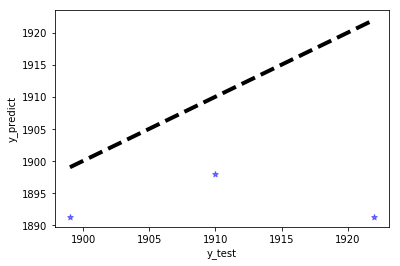

In [44]:
model_fit("DCLSA/la_dataset_split/ab/ab_pos_train_matrix.csv","DCLSA/la_dataset_split/ab/ab_pos_test_matrix.csv")

LR.intercept:
 1904.360172212903
LR.coef:
 [-0.2655096   0.04705254 -0.05961656 ... -0.00514005  0.
  0.00254857]
R^2:
 -0.1472252626528361
MSE: 101.21076206070575
RMSE: 10.060355960934272
y_predict:
 [1904.31096355 1906.23485148 1903.76730977]
y_test:
 0    1910
1    1922
2    1899
Name: YEAR, dtype: int64


D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


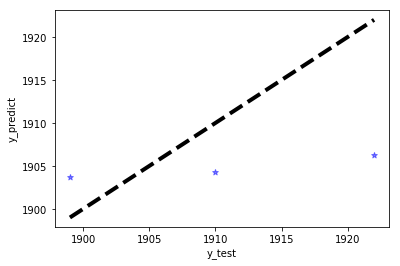

In [46]:
model_fit("DCLSA/la_dataset_split/ab/ab_lexical_train_matrix.csv","DCLSA/la_dataset_split/ab/ab_lexcial_test_matrix.csv")

D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


LR.intercept:
 1899.8018806397317
LR.coef:
 [ 6.94222047e-01 -2.77782628e-01  8.82362917e-02 ... -1.99038590e-03
 -2.94848747e-03 -3.60697311e-04]
R^2:
 0.42193951756349923
MSE: 105.75428399983272
RMSE: 10.283690193691791
y_predict:
 [1892.07042827 1884.39143456 1891.00467114 1894.36796342 1882.3420239 ]
y_test:
 0    1897
1    1875
2    1874
3    1890
4    1868
Name: YEAR, dtype: int64


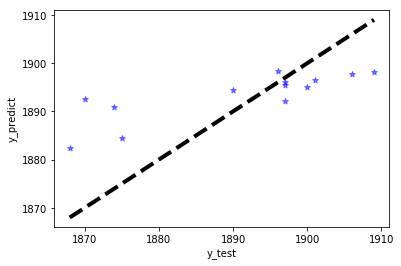

In [51]:
def model_fit2(train,test):
    train_data = pd.read_csv(train)
    train_data.drop(['Unnamed: 0'], axis=1,inplace=True)
    test_data = pd.read_csv(test)
    test_data.drop(['Unnamed: 0'], axis=1,inplace=True)

    X_train = train_data.iloc[:,0:-1]
    y_train = train_data.ix[:,-1]
    # print(X_train)
    # print(Y_train)
    X_test = test_data.iloc[:,0:-1]
    y_test = test_data.ix[:,-1]


    from sklearn.linear_model import  LinearRegression
    LR = LinearRegression()
    ### 对训练数据进行拟合训练
    LR.fit(X_train, y_train)
    ### 输出参数,分别是截距（intercept_）和权重参数(coef_）


    # from sklearn.linear_model import Ridge
    # ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
    # ridge_reg.fit(X, y)
    # ridge_reg.predict([[1.5]])


    # ##执行SGD的岭回归
    # sgd_reg=SGDRegressor(penalty="l2")
    # #sgd_reg.fit(X,y#这样也行，但有警告‘y = column_or_1d(y, warn=True
    # sgd_reg.fit(X,y.ravel())
    # sgd_reg.predict([[1.5]])





    print('LR.intercept:\n',LR.intercept_)
    print('LR.coef:\n',LR.coef_)
    ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
    print('R^2:\n',LR.score(X_test,y_test))
    ### 根据测试数据计算预测值y_predict
    y_predict=LR.predict(X_test)
    ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
    print ("MSE:",metrics.mean_squared_error(y_test,y_predict))
    ### RMSE为均方根误差
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


    print('y_predict:\n',y_predict[0:5])    ### 输出预测值前5行
    print('y_test:\n',y_test[0:5])          ### 输出测试值前5行
    plt.scatter(y_test,y_predict,c='b',alpha=0.5,marker='*')   
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)   ### 画出y=x这条线
    plt.show()

model_fit("DCLSA/la_dataset_split/amd_lexical_train_matrix.csv","DCLSA/la_dataset_split/amd_lexical_test_matrix.csv")

In [41]:
l = nltk.word_tokenize("In the python.")
print(l)
p = PorterStemmer()
stem = p.stem("Students")
print(stem)

['In', 'the', 'python', '.']
student
